# Plotting MNIST Dimension Reduction  
The purpose of this notebook is to generate plots to visualize the MNIST handwritten digits projection generated by `scripts/runTSNE.py` and `scripts/runUMAP.py`.

# User Parameters

`out_base`: output base for newly generated plots (Ex: `out_base = "../../umap-test/test"` will result in two output files: `../../umap-test/test-projection.png` and `../../umap-test/test-projection_with_digits-color.png`)  

`inp_base`: input base for files generated by `runUMAP.py` or `runTSNE.py` (Ex: `inp_base = "../../umap-test/test"` for input files `../../umap-test/test-umap_labels.txt` `../../umap-test/test-umap_projection.tsv`, and `../../umap-test/test-umap_images.npy`)  



In [13]:
import os

out_base = os.path.join("..", "..", "umap-test", "test")
inp_base = os.path.join("..", "..", "umap-test", "test")

labels_fp = "%s-umap_labels.txt" % inp_base
projection_fp = "%s-umap_projection.tsv" % inp_base
images_fp = "%s-umap_images.npy" % inp_base

# check that input files exist
for fp in (labels_fp, projection_fp, images_fp):
    assert os.path.isfile(fp)
    
# create output directory if it doesn't exist
out_dir = os.path.dirname(out_base)
if out_dir != "" and not os.path.isdir(out_dir):
    os.makedirs(out_dir)

In [26]:
import sys
import time

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

path = os.path.abspath("..")
if path not in sys.path:
    sys.path.append(path)

import utils.visualization

'\ndef show(image):\n    """\n    Render a given numpy.uint8 2D array of pixel data.\n    """\n    from matplotlib import pyplot\n    import matplotlib as mpl\n    fig = pyplot.figure()\n    ax = fig.add_subplot(1,1,1)\n    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)\n    imgplot.set_interpolation(\'nearest\')\n    ax.xaxis.set_ticks_position(\'top\')\n    ax.yaxis.set_ticks_position(\'left\')\n    pyplot.show()\n\n    return\n'

# Load data

In [15]:
# import t-SNE output
labels = np.loadtxt(labels_fp, dtype=int)
projections = np.loadtxt(projection_fp, dtype=float)
images = np.load(images_fp)

n = len(labels)
print("Number of projections: %i" % n)
assert len(projections) == len(images) == n

Number of projections: 5000


# Scatter plot of projection

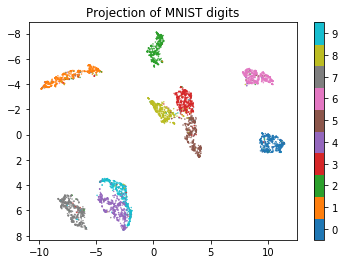

In [22]:
fig, ax = plt.subplots()

x = projections[:,0]
y = projections[:,1]

plt.scatter(x, y, s=0.2, c=labels, cmap="tab10")
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

ax.set_title("Projection of MNIST digits")
ax.invert_yaxis()

plt.show()
fig.savefig("%s-projection.png" % out_base, dpi=300)

# Scatter plot with points replaced by handwritten digits  
`grayscale`: if True, generate the image in grayscale; otherwise generate in color  
`density`: use this parameter to tune how densely the handwritten digits are placed on top of each other.  
`num_digits`: you can adjust the parameter to limit the number of digits displayed (the more you try to project the larger the file and longer it takes to run)

Run time: 9.39 secs


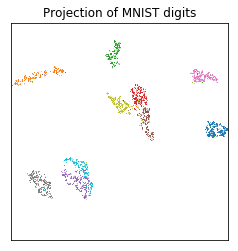

In [30]:
# User parameters
grayscale = False
density = 0.5
num_digits = len(images)

if grayscale:
    colors = None
    cmap = mpl.cm.Greys
    out_fp = "%s-projection_with_digits-grayscale.png" % out_base
else:
    colors = [np.array(c) for c in mpl.cm.tab10.colors]
    cmap = mpl.cm.tab10
    out_fp = "%s-projection_with_digits-color.png" % out_base

# Build the image data
start_time = time.time()
canvas = utils.visualization.build_digit_image_data(images[:num_digits], projections[:num_digits], labels[:num_digits], density=density, colors=colors)
dt = time.time() - start_time
print("Run time: %2.2f secs" % dt)

# Display image data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
imgplot = ax.imshow(canvas, cmap=cmap, origin="upper")
imgplot.set_interpolation('nearest')
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

ax.set_title("Projection of MNIST digits")

plt.show()
fig.savefig(out_fp, dpi=2000, bbox_inches="tight")